# Covid Data Analysis Exercise

## Prof. Carlo Contaldi (c.contaldi@imperial.ac.uk)

## Theoretical Physics Group

## 505 Huxley

This is an exercise in using time-ordered data for regression analysis and forecasting. 

- `Datetime` library is a very useful module that makes it very easy to treat time stamps and plotting time ordered data.
- `Pandas`. We will use Pandas to handle data efficiently.

- Visit https://coronavirus.data.gov.uk/ to look at the available data.
- https://coronavirus.data.gov.uk/details/developers-guide/main-api explains the API interface. You will need to install the `uk_covid19` package. If this is not possible you can also download metrics individually using the website. 

## 1. Setup

In [22]:
import pandas as pd
import datetime as dt
import numpy as np

import matplotlib.pylab as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#Show plots inline
%matplotlib inline

#Some date formatters to use for plotting 
weeks = mdates.WeekdayLocator()
years = mdates.YearLocator()
months = mdates.MonthLocator()
weekdays = mdates.DayLocator()
dateFmt = mdates.DateFormatter('%b-%y')


In [23]:
#seaborn is a useful package for handling graphics and 
#producing publication quality images with better colour schemes
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("talk")
#sns.set(font_scale=1.5) 
#sns.set_context("poster")

plt.rcParams.update({'font.size': 32})
plt.rcParams.update({'lines.linewidth':3})

In [24]:
pip install uk-covid19

Note: you may need to restart the kernel to use updated packages.


## 2. Importing UK COVID metrics

Next we can import the API package to download government covid metrics

Package install e.g.: `pip install uk-covid19`. If you are having trouble installing this I can provide the data.

This package is an interface to the UK government https://coronavirus.data.gov.uk/

We will use covid metrics as the dependent variables or outcomes in the regression problem.

In [25]:
from uk_covid19 import Cov19API

The following is an example download of covid cases, hospital occupancy and admissions, and deaths. You can query many of the metrics.

In [26]:
#Admin hierarchy of data (can also be regional and local)
areaType = 'nation'
area_filter = ['areaType={}'.format(areaType)]

#Form the API query
query = { "areaType":"areaType" ,"areaName":"areaName" ,"areaCode":"areaCode","specimenDate":"date"
         ,"dailyLabConfirmedCases":"newCasesBySpecimenDate","hospital":"hospitalCases"
         ,"newAdmissions":"newAdmissions","deaths":"newDeaths28DaysByDeathDate"
        }
api_query = Cov19API(filters=area_filter, structure=query)

#return a pandas dataframe. Other formats can be used e.g. JSON etc.
df = api_query.get_dataframe()

#rename columns
df.columns = ['Area type', 'Area name', 'Area code', 'Date', 'Cases','Hospital', 'Admissions', 'Deaths']
#Re-index by date
df.set_index(pd.to_datetime(df['Date'], format='%Y-%m-%d'),inplace=True)
df.sort_index(inplace=True)
df

,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths
Date,,,,,,,,
2020-01-30,nation,England,E92000001,2020-01-30,1.0,NaN,NaN,NaN
2020-01-31,nation,England,E92000001,2020-01-31,0.0,NaN,NaN,NaN
2020-02-01,nation,England,E92000001,2020-02-01,0.0,NaN,NaN,NaN
2020-02-02,nation,England,E92000001,2020-02-02,1.0,NaN,NaN,NaN
2020-02-03,nation,England,E92000001,2020-02-03,18.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-06,nation,England,E92000001,2023-11-06,740.0,NaN,NaN,NaN
2023-11-07,nation,England,E92000001,2023-11-07,681.0,NaN,NaN,NaN
2023-11-07,nation,Wales,W92000004,2023-11-07,18.0,NaN,NaN,0.0


In [27]:
#Select just England data but Wales, Scoltand, and Northern Ireland can also be chosen
df_Eng = df[df['Area name']=='England'].copy()

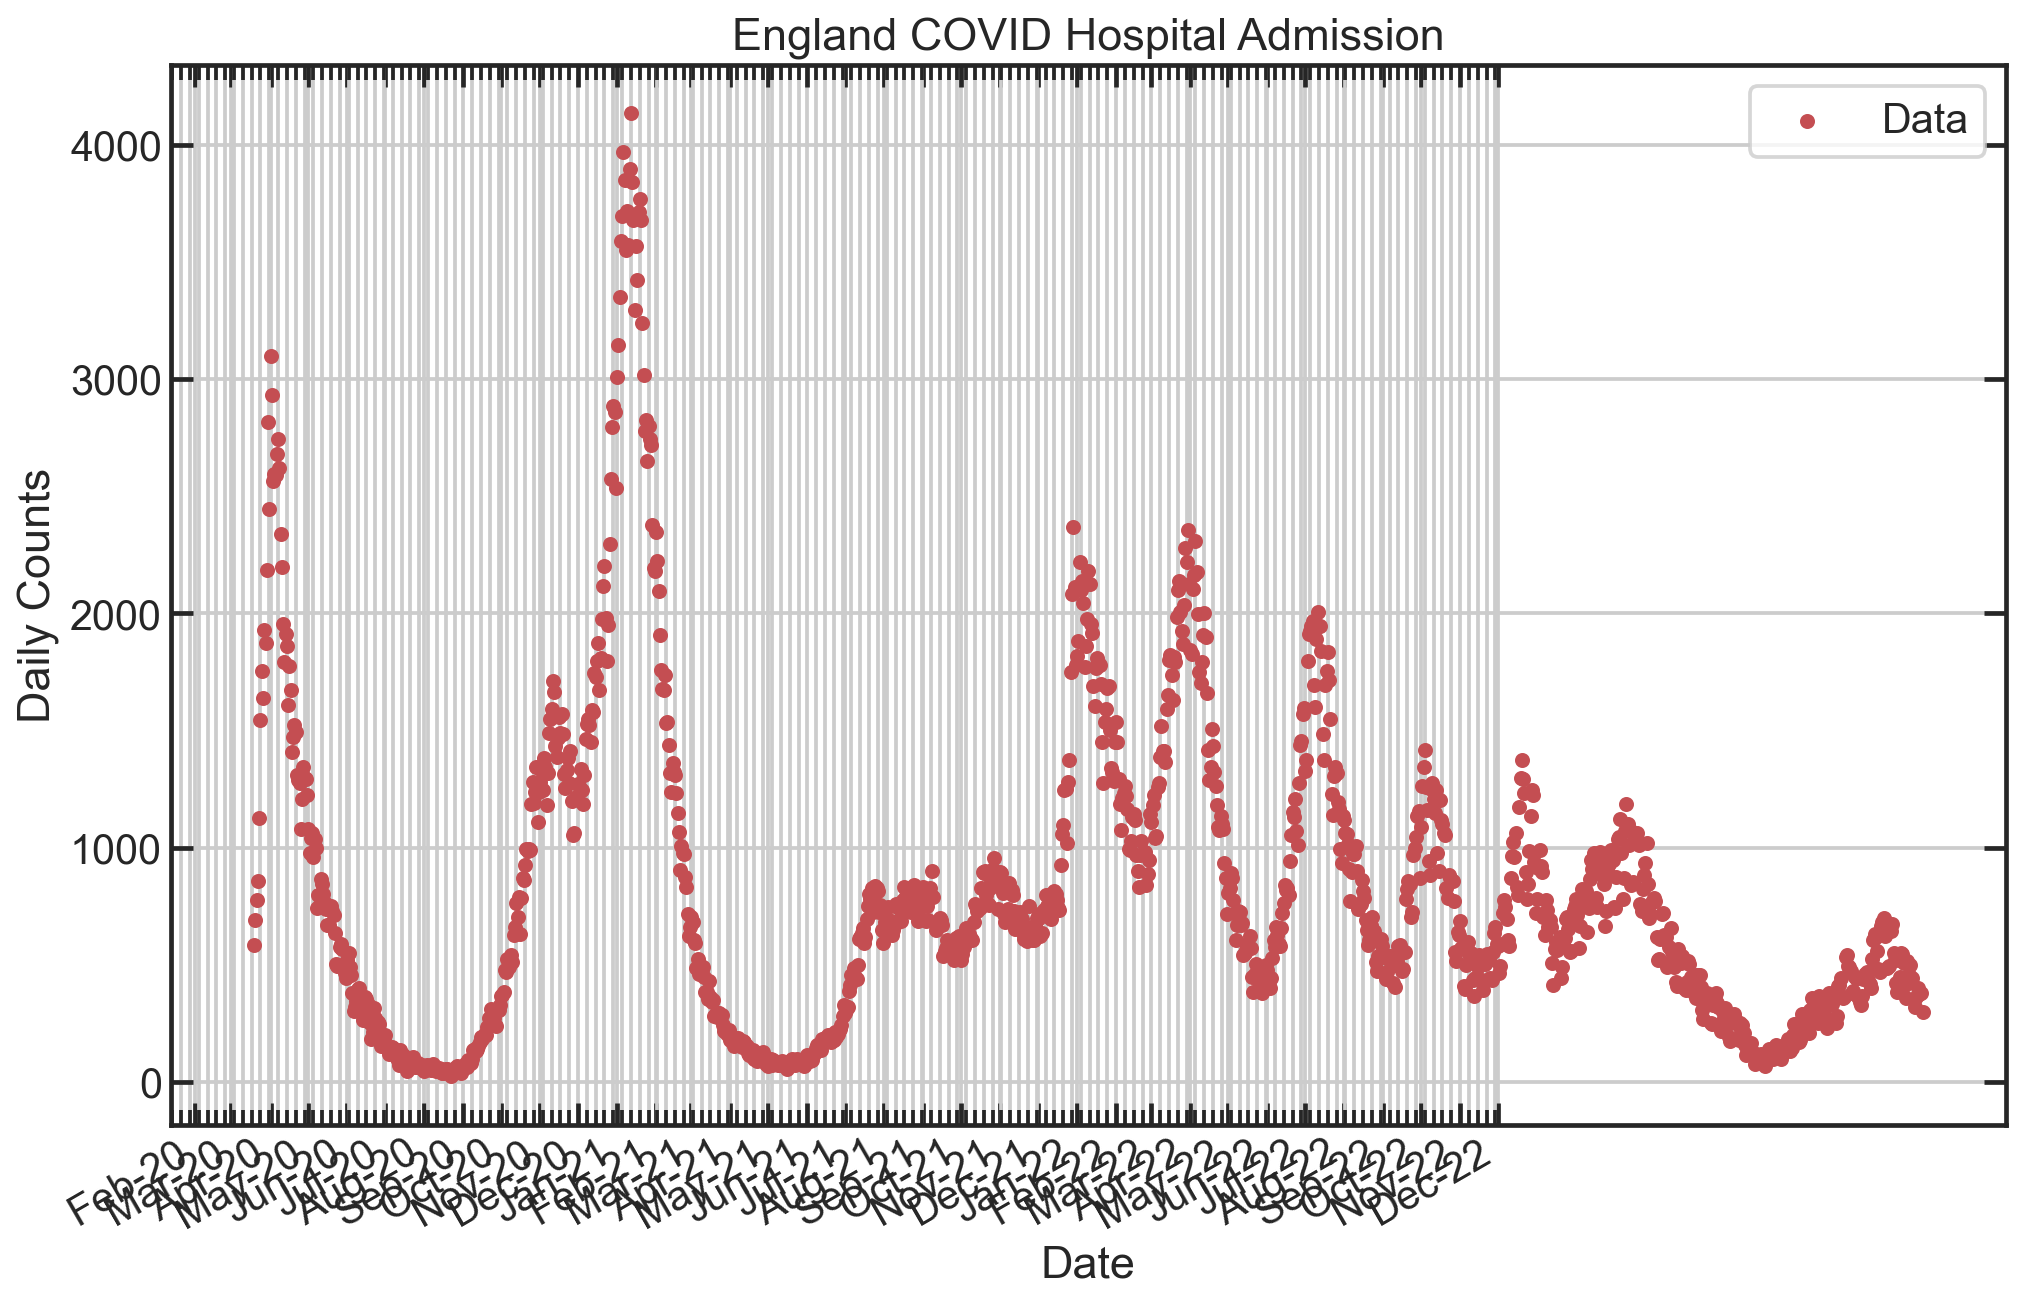

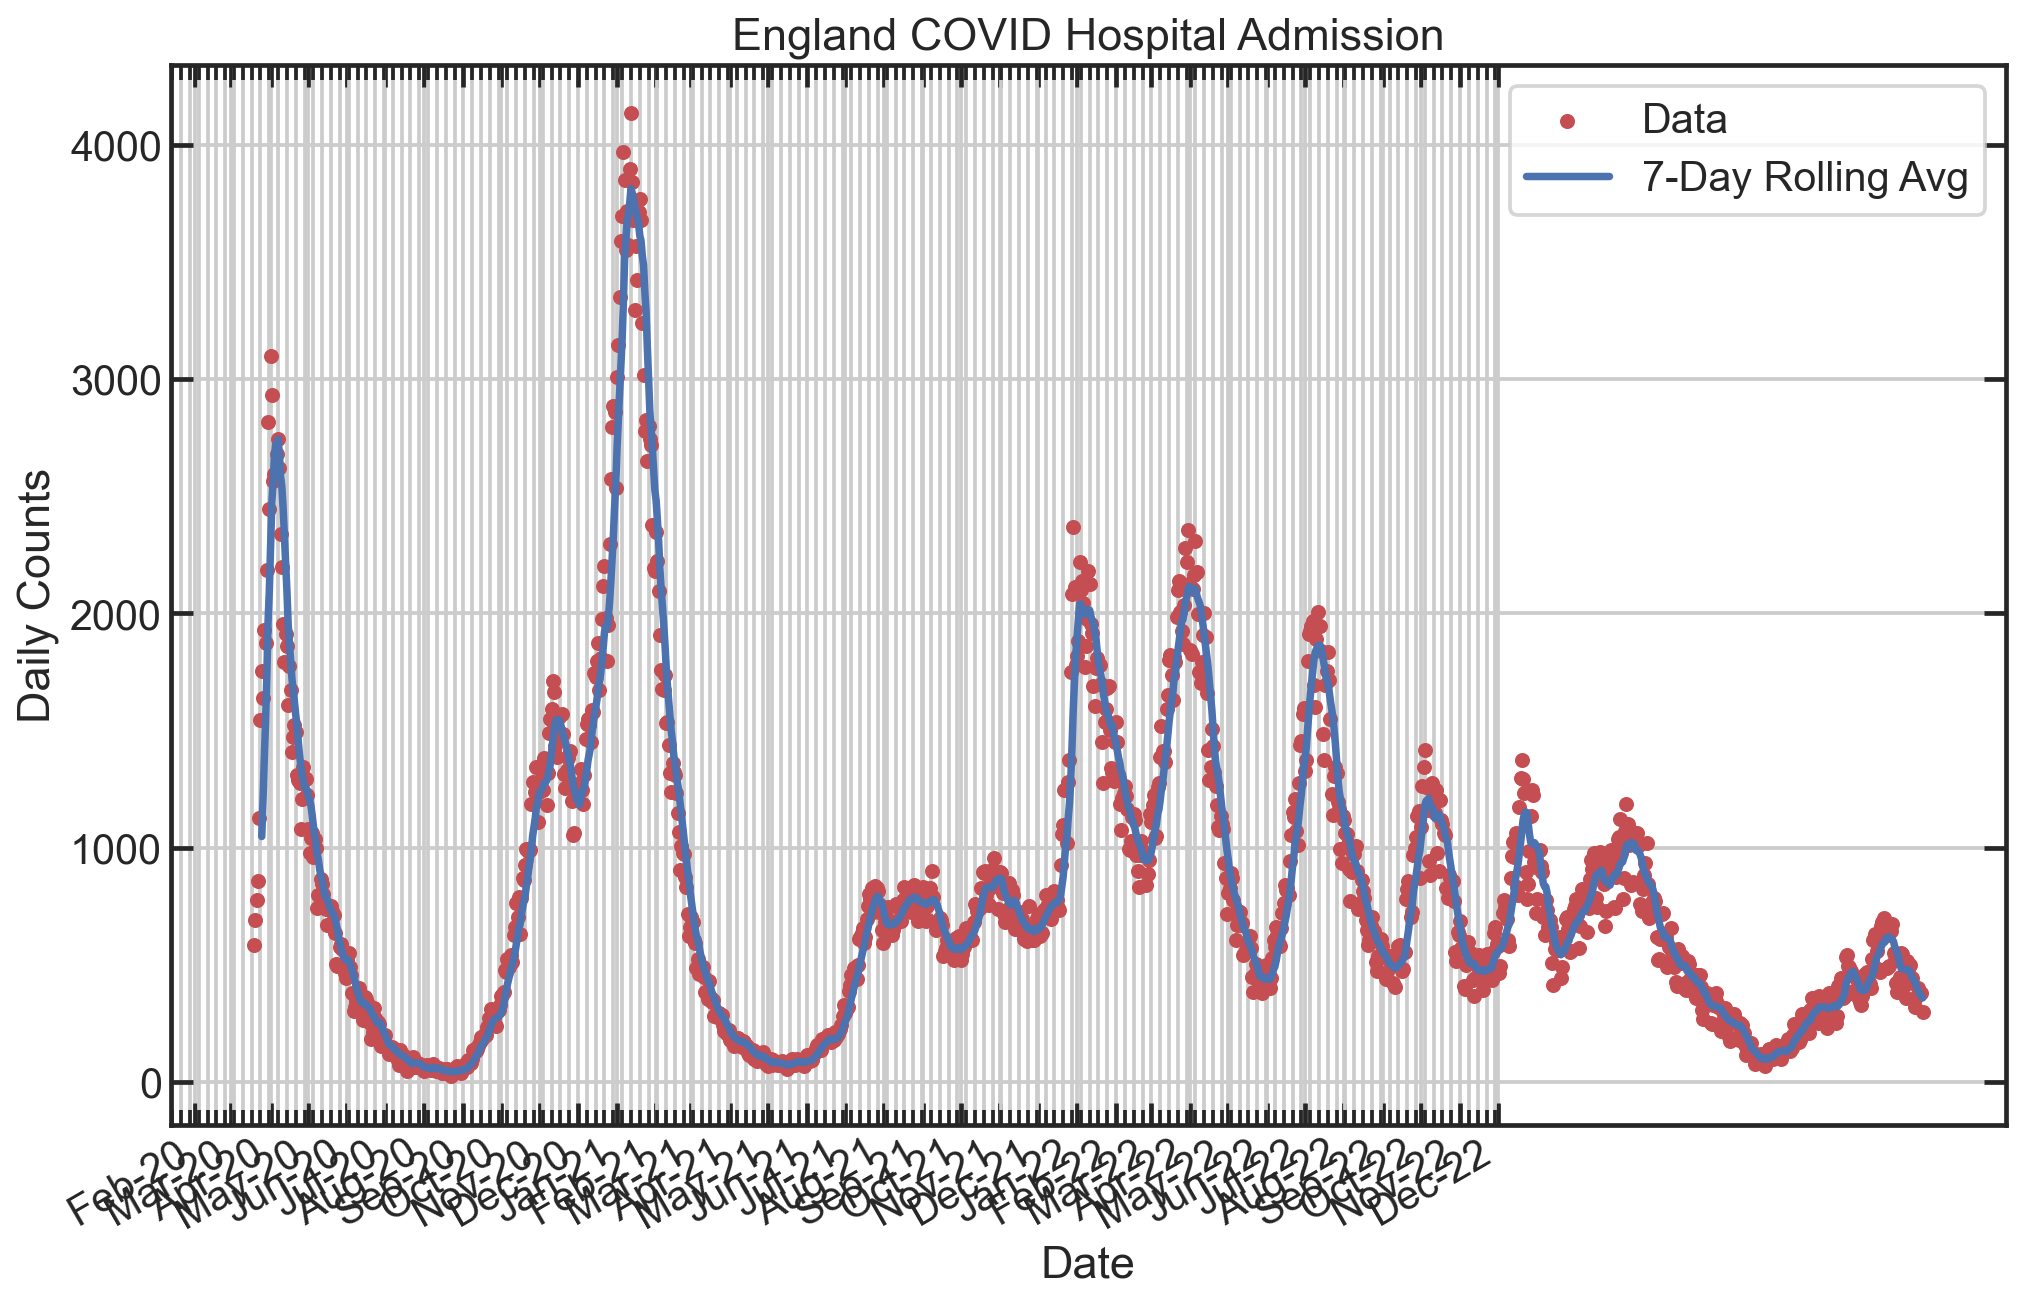

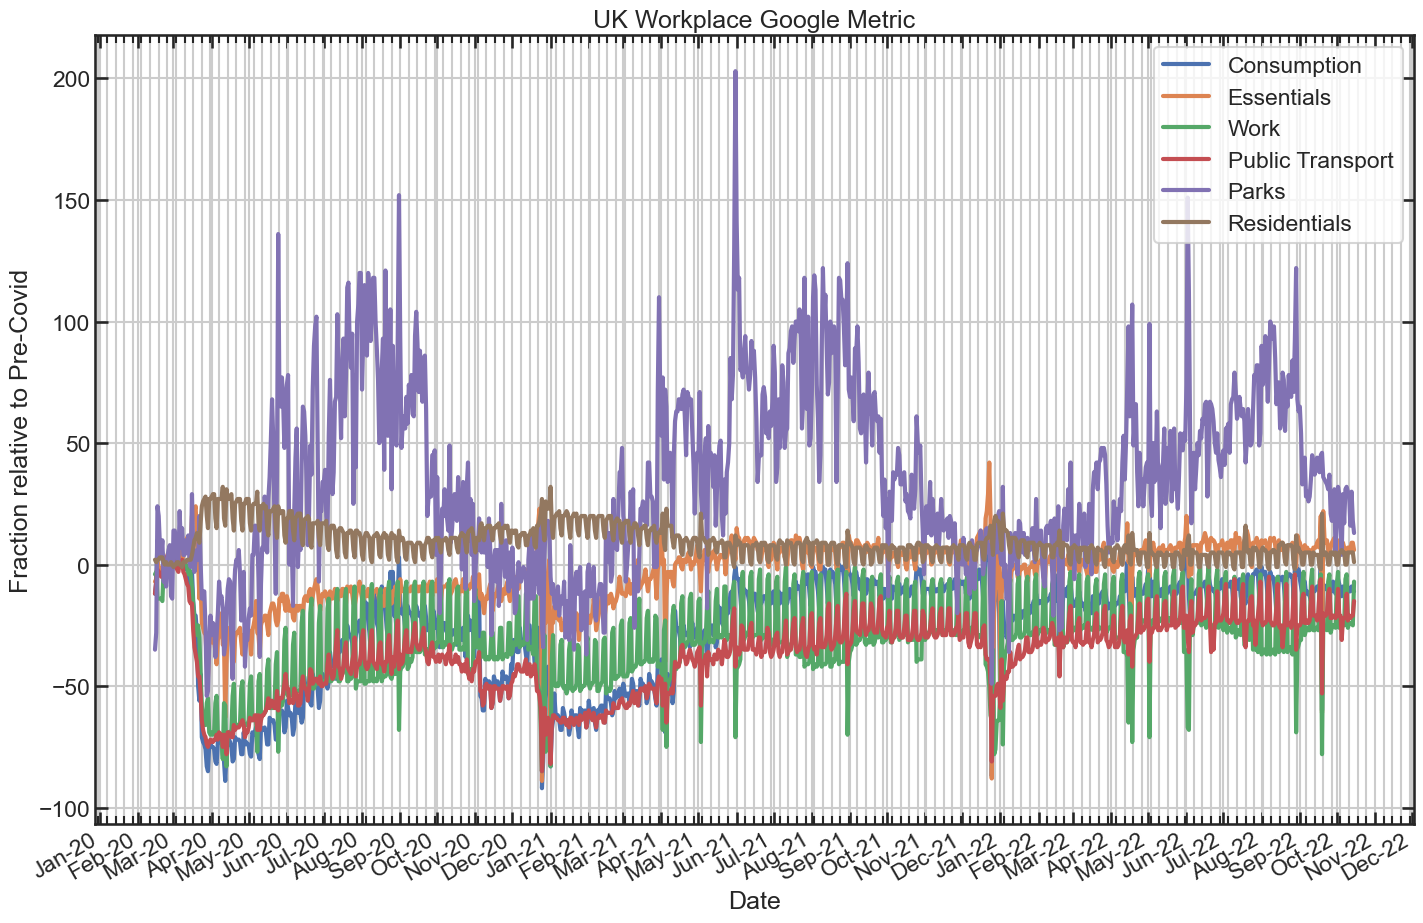

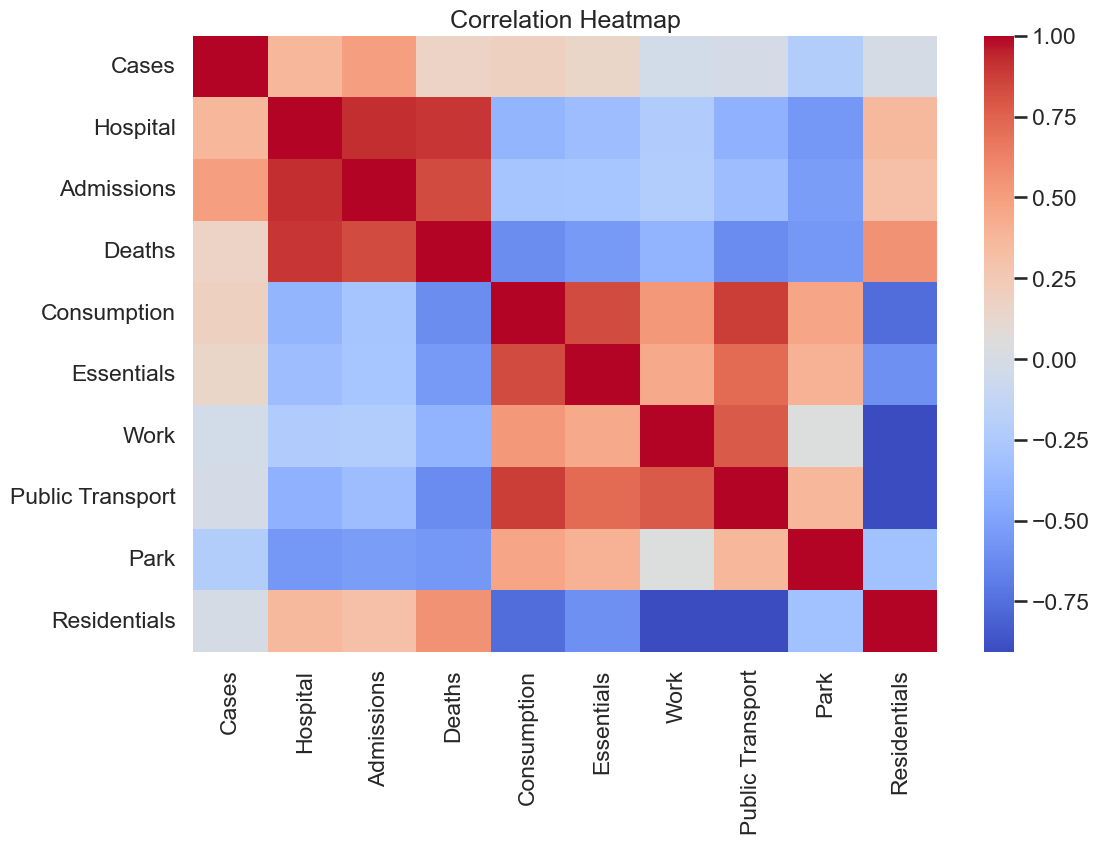

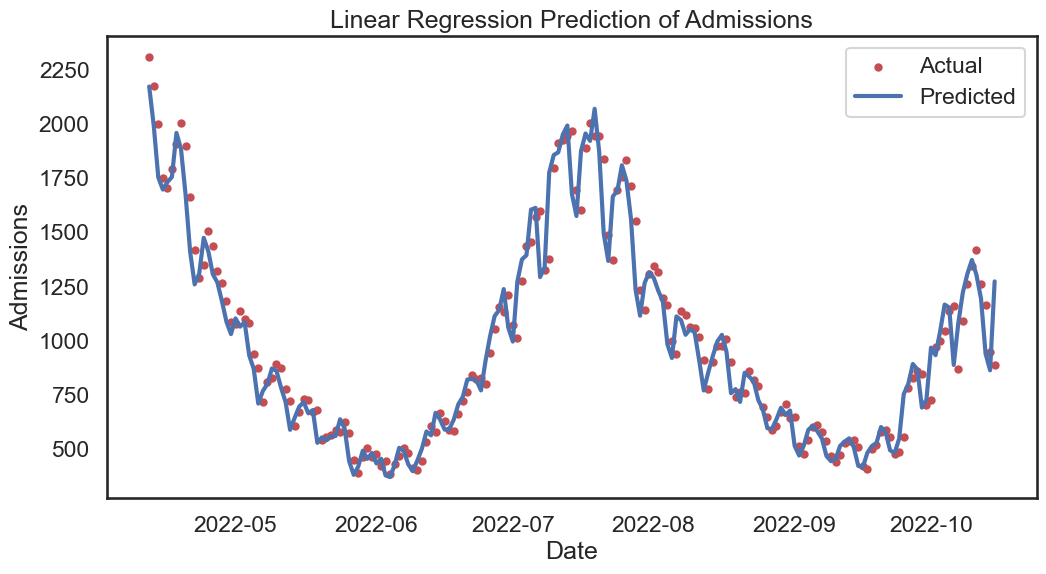

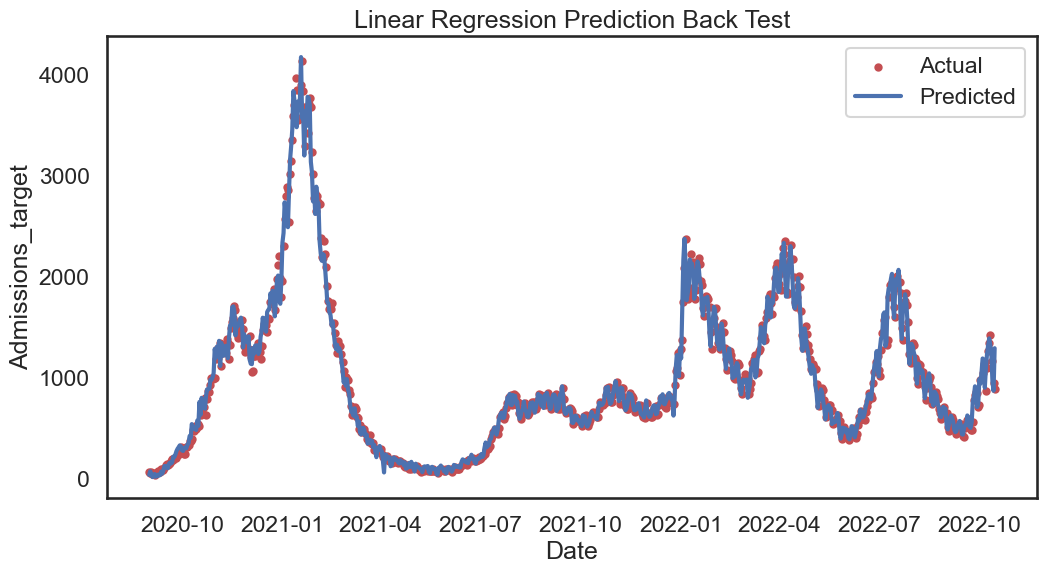

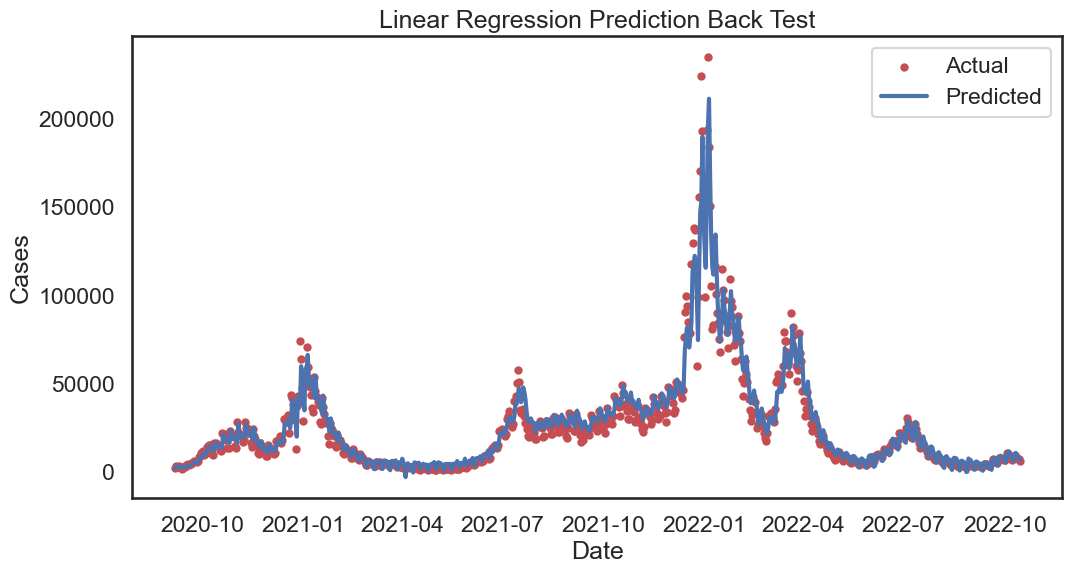

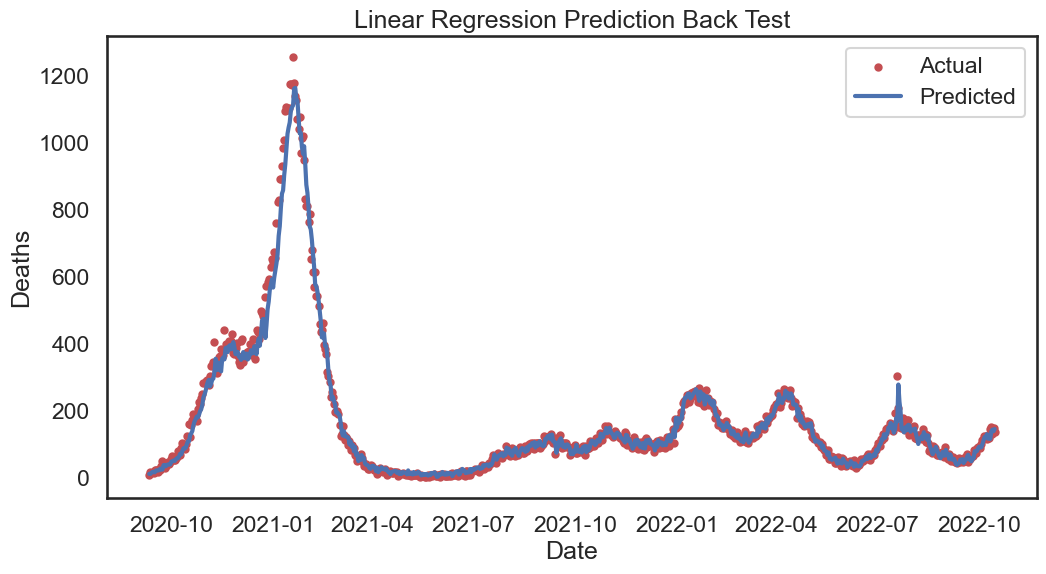

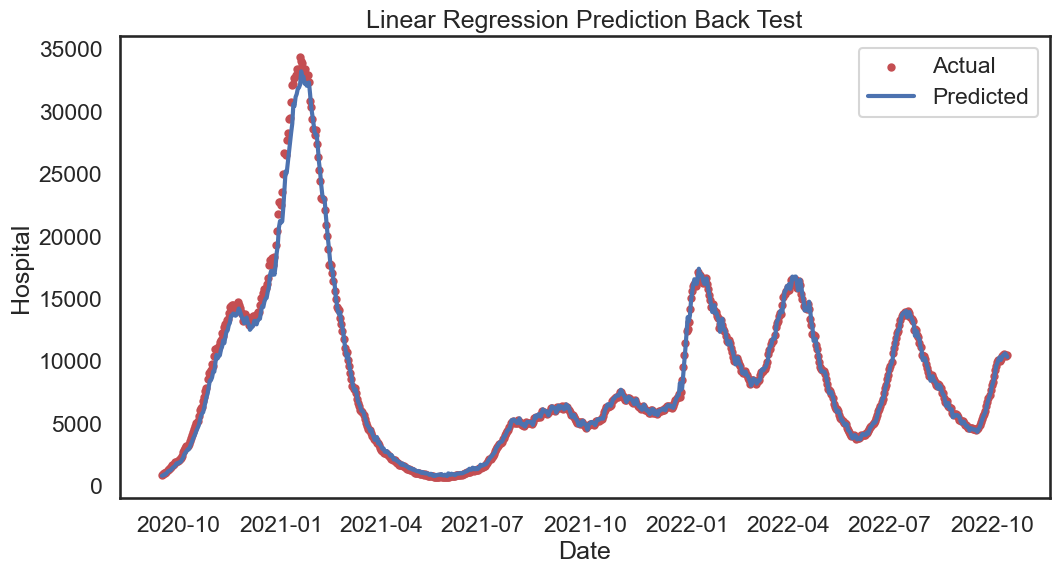

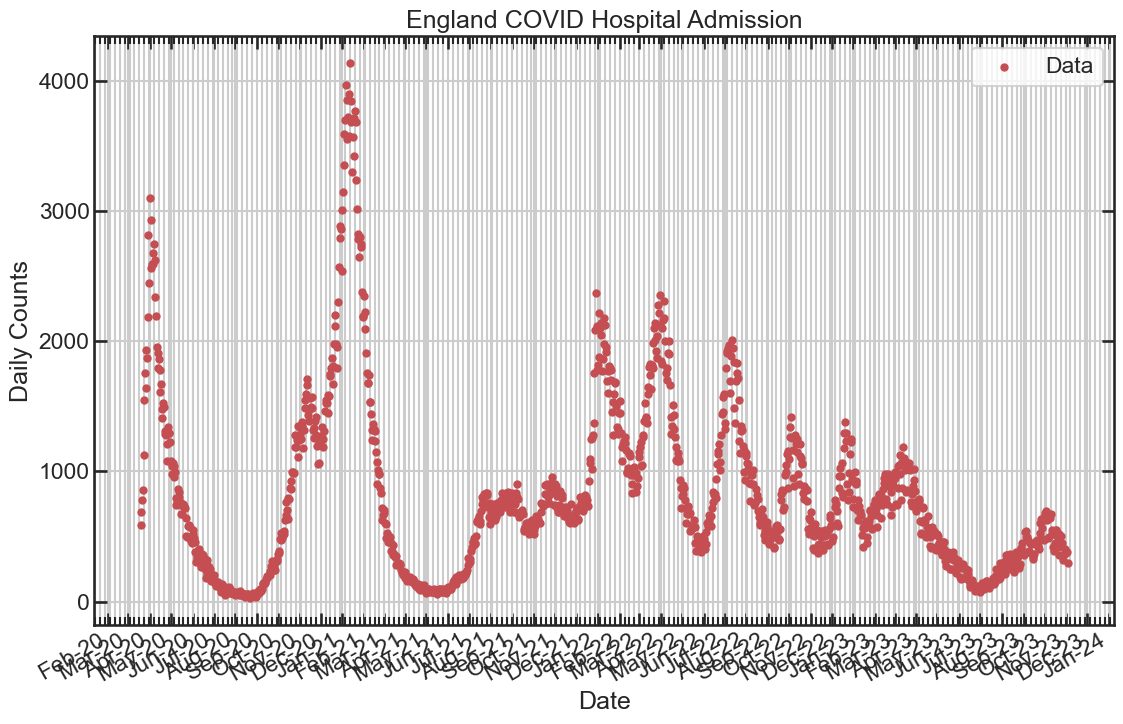

In [28]:
#Plot up some data

fig, ax = plt.subplots(figsize=(12,8),sharex= True, facecolor='white')

ax.scatter(df_Eng.index,df_Eng['Admissions'],label='Data',marker='.',c='C3')


#Make it pretty
ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)

#ax.set_ylim(bottom=0)
ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Counts')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)
#ax.set_xlim(left=dt.datetime(2021,7,1))
ax.set_title('England COVID Hospital Admission')
ax.legend()

_= fig.autofmt_xdate()

plt.tight_layout()
plt.savefig('example.png')

For visualisation purposes it is often useful to take rolling averages of the noisy data.

- Add a 7-day rolling average of the hospital admissions column to the plot. See `DataFrame.rolling()` for a native method.

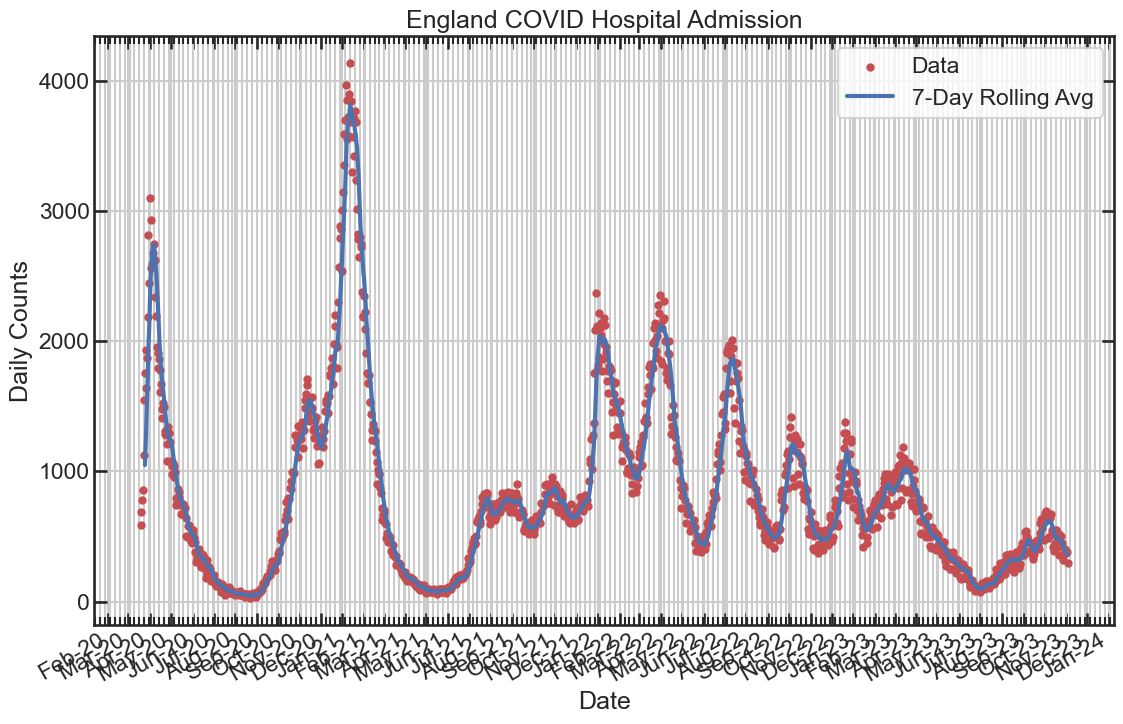

In [29]:
# Calculate the 7-day rolling average
rolling_avg = df_Eng['Admissions'].rolling(window=7).mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8), sharex=True, facecolor='white')

# Plot the hospital admissions data as a scatter plot
ax.scatter(df_Eng.index, df_Eng['Admissions'], label='Data', marker='.', c='C3')

# Plot the rolling average as a line plot
ax.plot(df_Eng.index, rolling_avg, label='7-Day Rolling Avg', color='C0')

# Make it pretty
ax.tick_params(axis="both", direction="in", which="both", right=True, left=True, top=True, bottom=True)
ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Counts')

# Format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)

ax.set_title('England COVID Hospital Admission')
ax.legend()
_ = fig.autofmt_xdate()

plt.tight_layout()
plt.savefig('example.png')


## 3. Predictors

In principle, covid cases, hospital admissions, and deaths are time-lagged outcomes of covariates or "predictor variables" such as the level of interactions in the population, mobility metrics, levels of restrictions etc.

A data set which is often used as a possible predictor is google mobility metrics https://www.google.com/covid19/mobility/.

In [30]:
#Import the data from Google.
#This is a large file!
df_google = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

/var/folders/0s/mb9fgjm160s47ts_ym1l7b240000gn/T/ipykernel_3369/1332668652.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_google = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')


In [31]:
#Select `United Kingdom` from the full data.
df_google = df_google[df_google['country_region']=='United Kingdom']
#Discard sub regions
#Note - we England vs UK
df_google = df_google[df_google['sub_region_1'].isnull()]

In [32]:
#Re-index by data
df_google.set_index(pd.to_datetime(df_google['date']),inplace=True)
df_google.sort_index(inplace=True)
df_google.columns
df_google

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2020-02-15,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
2020-02-16,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
2020-02-17,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0
2020-02-18,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0
2020-02-19,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2022-10-11,-11.0,7.0,29.0,-21.0,-24.0,5.0
2022-10-12,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2022-10-12,-11.0,6.0,16.0,-22.0,-24.0,5.0
2022-10-13,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2022-10-13,-9.0,9.0,30.0,-21.0,-24.0,5.0


Plot up some of the metrics. 

How do they compare (correlate) against covid admissions?

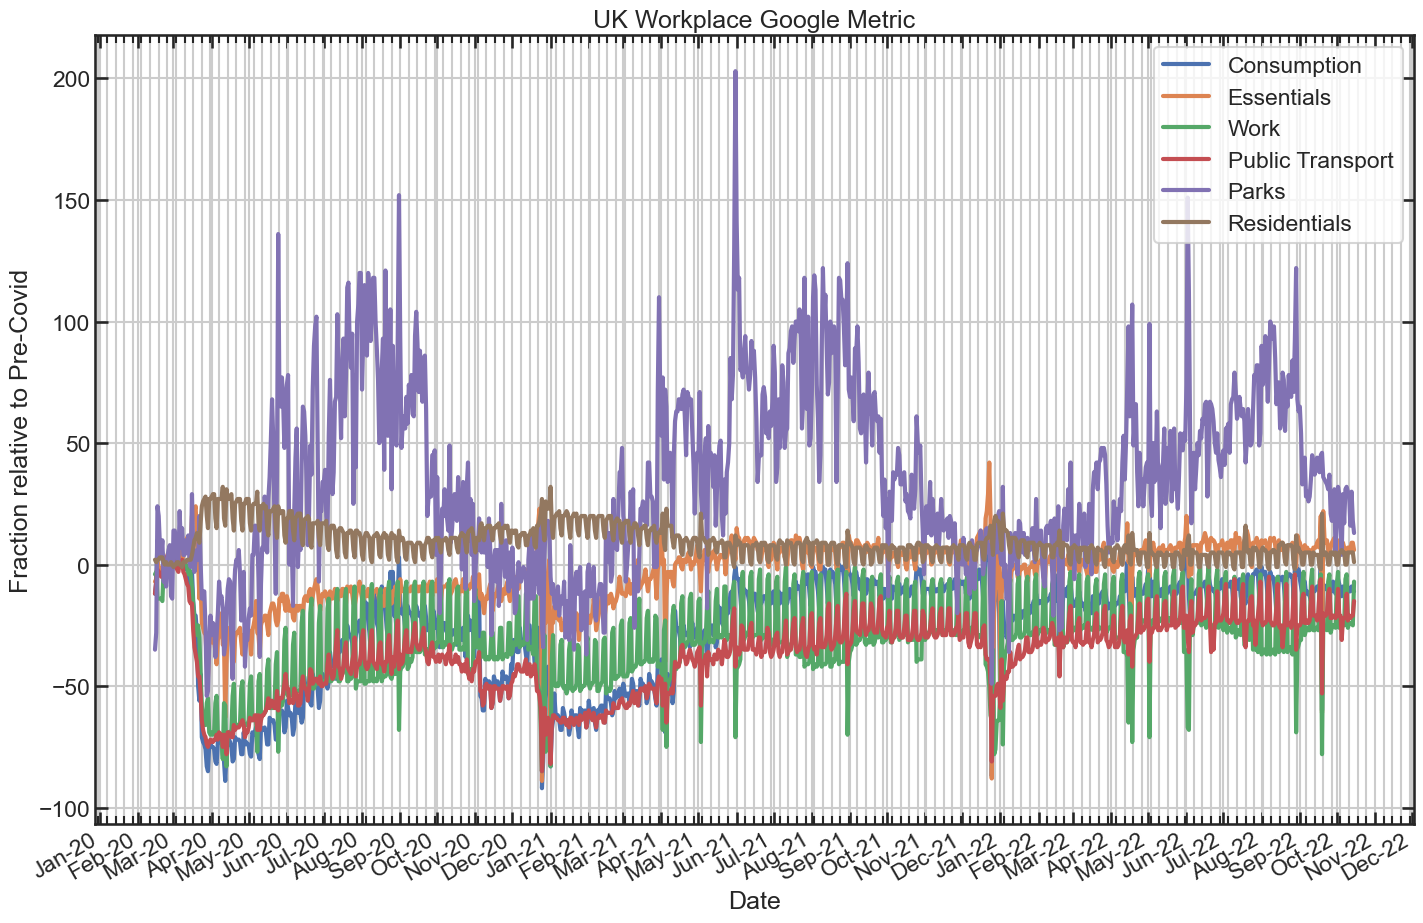

In [33]:
fig, ax = plt.subplots(figsize=(15,10),sharex= True, facecolor='white')
ax.plot(df_google.index,df_google['retail_and_recreation_percent_change_from_baseline'],label='Consumption')
ax.plot(df_google.index,df_google['grocery_and_pharmacy_percent_change_from_baseline'],label='Essentials')
ax.plot(df_google.index,df_google['workplaces_percent_change_from_baseline'],label='Work')
ax.plot(df_google.index,df_google['transit_stations_percent_change_from_baseline'],label='Public Transport')
ax.plot(df_google.index,df_google['parks_percent_change_from_baseline'],label='Parks')
ax.plot(df_google.index,df_google['residential_percent_change_from_baseline'],label='Residentials')

ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)
ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Fraction relative to Pre-Covid')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)
# ax.set_xlim(left=dt.datetime(2021,7,1))
ax.set_title('UK Workplace Google Metric')
ax.legend()

_= fig.autofmt_xdate()

plt.tight_layout()
plt.savefig('mobility.png')

## 4. Exercise

- "Clean" the data of periodic systematics.
- Experiment using linear regression to create a model for covid metrics (time-lagged) with mobility metrics as covariates.
- Can you use this model to "predict" covid severity?

A good starting point for this is the `sklearn` Linear Regression method https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.
`sklearn` includes many other, more advanced methods, for cases where the space of covariates has large dimensions.

- Think about what data you use to calibrate your model.
- Can you back test the data?
- How well does your method work? What should you expect?

- Can you think of other data that could be used as covariates (predictors) or how to change this regression to make it work better?


#### Import package

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

#### Correlation between Dependents and Covariates
Before creating the model, we calculate the correlation matrix of dependents and covariates, draw a heatmap to show the correlation between them.

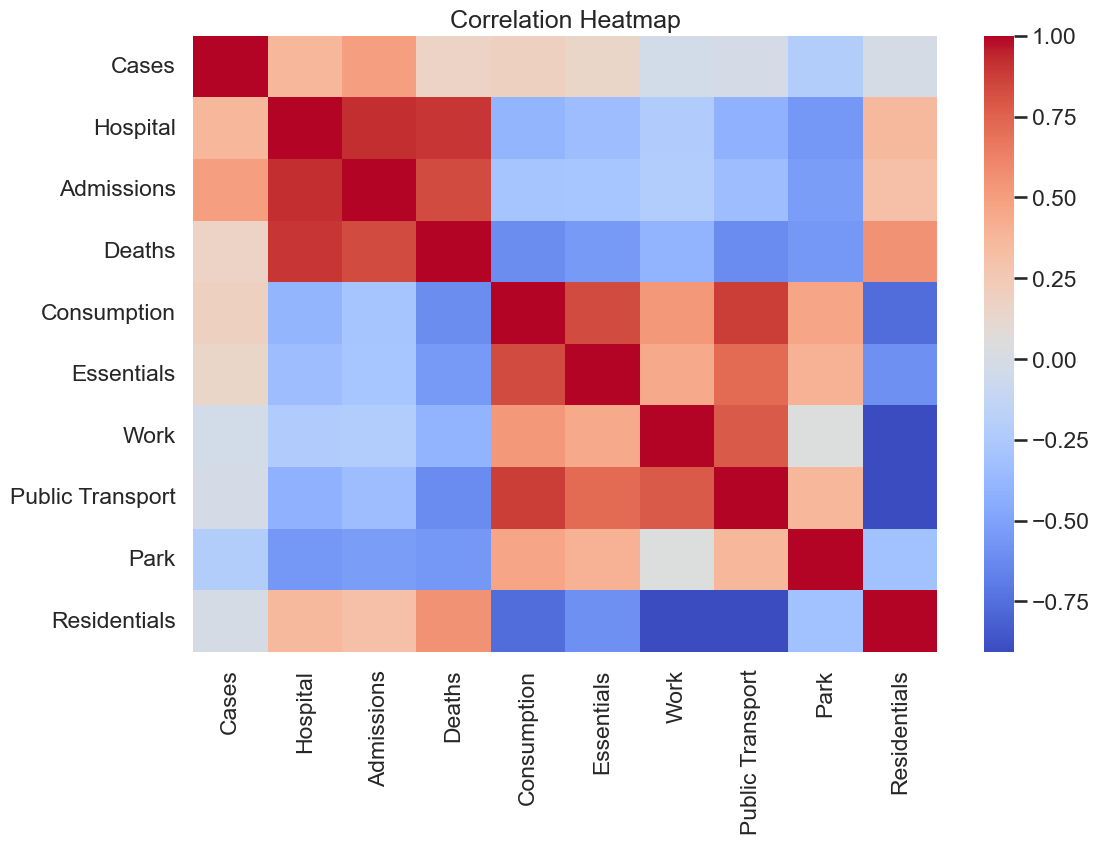

In [35]:
covid_metrics = ['Cases', 'Hospital', 'Admissions', 'Deaths']
mobility_metrics = ['retail_and_recreation_percent_change_from_baseline',
                     'grocery_and_pharmacy_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline',
                     'transit_stations_percent_change_from_baseline',
                     'parks_percent_change_from_baseline',
                     'residential_percent_change_from_baseline']
merged_df = pd.concat([df_Eng[covid_metrics], df_google[mobility_metrics]], axis=1)
column_mapping = {
    'retail_and_recreation_percent_change_from_baseline': 'Consumption',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Essentials',
    'workplaces_percent_change_from_baseline': 'Work',
    'transit_stations_percent_change_from_baseline': 'Public Transport',
    'parks_percent_change_from_baseline': 'Park',
    'residential_percent_change_from_baseline': 'Residentials',
}
merged_df = merged_df.rename(columns=column_mapping)
# calculate correlation matrix
correlation_matrix = merged_df.corr()

# draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### Clean the periodic systematics and feature engineering

In [46]:
# merge df_Eng and df_google
df_Eng_adjusted = df_Eng[(df_Eng.index >= df_google.index.min()) & (df_Eng.index <= df_google.index.max())]
data = pd.merge(df_Eng_adjusted, df_google, how='inner', left_index=True, right_index=True)
# time lag
target_lag_days = 7
data['Admissions_target'] = data['Admissions'].shift(target_lag_days)
lag_days = 1
data['Admissions_lag1'] = data['Admissions'].shift(lag_days)
lag_days = 2
data['Admissions_lag2'] = data['Admissions'].shift(lag_days)
lag_days = 3
data['Admissions_lag3'] = data['Admissions'].shift(lag_days)
lag_days = 4
data['Admissions_lag4'] = data['Admissions'].shift(lag_days)
lag_days = 5
data['Admissions_lag5'] = data['Admissions'].shift(lag_days)
lag_days = 6
data['Admissions_lag6'] = data['Admissions'].shift(lag_days)

# choose metric
features = [
           'retail_and_recreation_percent_change_from_baseline',
           'grocery_and_pharmacy_percent_change_from_baseline',
           'workplaces_percent_change_from_baseline',
           'transit_stations_percent_change_from_baseline',
           'parks_percent_change_from_baseline', 
           'residential_percent_change_from_baseline',
           'Admissions_lag1',
           'Admissions_lag2',
           'Admissions_lag3',
           'Admissions_lag4',
           'Admissions_lag5',
           'Admissions_lag6',
           ]
target = 'Admissions_target'
print(data['Admissions'].iloc[7:],data['Admissions_target'],data['Admissions_lag1'],data['Admissions_lag2'])
# normalization
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# deal with NaN
data = data.dropna(subset=['Admissions_target'])


Date
2020-02-22       NaN
2020-02-23       NaN
2020-02-24       NaN
2020-02-25       NaN
2020-02-26       NaN
               ...  
2022-10-11    1207.0
2022-10-12    1150.0
2022-10-13    1247.0
2022-10-14     978.0
2022-10-15     900.0
Name: Admissions, Length: 967, dtype: float64 Date
2020-02-15       NaN
2020-02-16       NaN
2020-02-17       NaN
2020-02-18       NaN
2020-02-19       NaN
               ...  
2022-10-11    1418.0
2022-10-12    1259.0
2022-10-13    1163.0
2022-10-14     946.0
2022-10-15     885.0
Name: Admissions_target, Length: 974, dtype: float64 Date
2020-02-15       NaN
2020-02-16       NaN
2020-02-17       NaN
2020-02-18       NaN
2020-02-19       NaN
               ...  
2022-10-11    1275.0
2022-10-12    1207.0
2022-10-13    1150.0
2022-10-14    1247.0
2022-10-15     978.0
Name: Admissions_lag1, Length: 974, dtype: float64 Date
2020-02-15       NaN
2020-02-16       NaN
2020-02-17       NaN
2020-02-18       NaN
2020-02-19       NaN
               ...  
2022-10-11 

#### Create the basic linear regression model

Root Mean Squared Error: 110.826944434519
R-squared: 0.9434754977122111


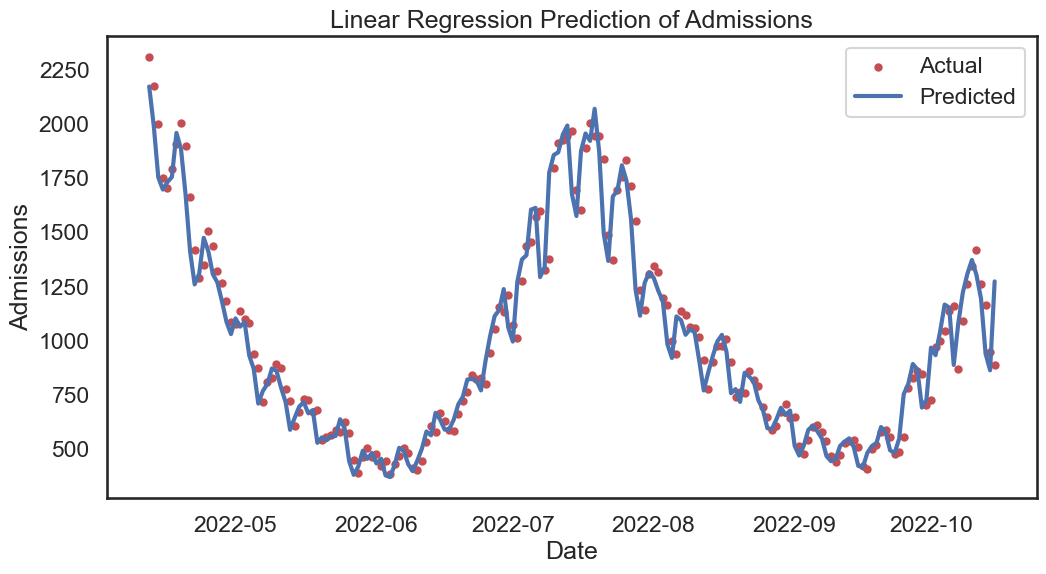

In [37]:
# split the train and test
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

r_squared = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared}')

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual', marker='.', c='C3')
plt.plot(y_test.index, predictions, label='Predicted', color='C0')
plt.xlabel('Date')
plt.ylabel('Admissions')
plt.title('Linear Regression Prediction of Admissions')
plt.legend()
plt.show()

In the initial linear regression model, only mobility metrics was selected as the FEATURE, and the model was very bad. Then we carried out the time lag and introduced autoregressive factors, and the model efficiency was greatly improved. The well-fit between the prediction and the true values on the test set using the trained model reached 0.94, indicating that the prediction results are accurate enough.

#### Use cross validation to Back Test

In [38]:
def build_regression_model(features, target, n_split=5):
    n_splits=5
    
    index = TimeSeriesSplit(n_splits)
    
    rmse_list = []
    r_list = []
    predictions = []
    
    for train_index, test_index in index.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]
    
    
        X_train, X_test = train[features], test[features]
        y_train, y_test = train[target], test[target]
    
        model = LinearRegression()
    
        model.fit(X_train, y_train)
    
        prediction = model.predict(X_test)
        predictions.append(prediction)
    
        r_squared = r2_score(y_test, prediction)
        r_list.append(r_squared)
        # print(f'R-squared: {r_squared}')
    
        rmse = np.sqrt(mean_squared_error(y_test, prediction))
        rmse_list.append(rmse)
    
        # plt.figure(figsize=(12, 6))
        # plt.scatter(y_test.index, y_test, label='Actual', marker='.', c='C3')
        # plt.plot(y_test.index, prediction, label='Predicted', color='C0')
        # plt.xlabel('Date')
        # plt.ylabel('Target')
        # plt.title(f'Linear Regression Prediction - Fold {len(r_list)}')
        # plt.legend()
        # plt.show()
    
    for i in range(n_splits):
        print(f'Fold {i} RMSE: {rmse_list[i]}')
        print(f'Fold {i} R-squared: {r_list[i]}\n')
    
    print(f'Average RMSE across folds: {np.mean(rmse_list)}')
    print(f'Average R-squared: {np.mean(r_list)}')
    
    merged_predictions = np.concatenate(predictions, axis=0)
    plt.figure(figsize=(12, 6))
    data_predict = data.tail(5*len(prediction))
    plt.scatter(data_predict.index, data_predict[target], label='Actual', marker='.', c='C3')
    plt.plot(data_predict.index, merged_predictions, label='Predicted', color='C0')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title('Linear Regression Prediction Back Test')
    plt.legend()
    plt.show()


Abstract the cross-validation and linear regression processes into functions and plot the predicted values of the model against the true values over the overall time period

#### Admissions

#### Cases

Fold 0 RMSE: 6012.144946964091
Fold 0 R-squared: 0.8216531359592878

Fold 1 RMSE: 2059.508446738116
Fold 1 R-squared: 0.9115537897058343

Fold 2 RMSE: 5401.074061448865
Fold 2 R-squared: 0.568921884444745

Fold 3 RMSE: 14080.739045314225
Fold 3 R-squared: 0.9057140445463123

Fold 4 RMSE: 2312.6739759341754
Fold 4 R-squared: 0.8649741056409839

Average RMSE across folds: 5973.228095279895
Average R-squared: 0.8145633920594326


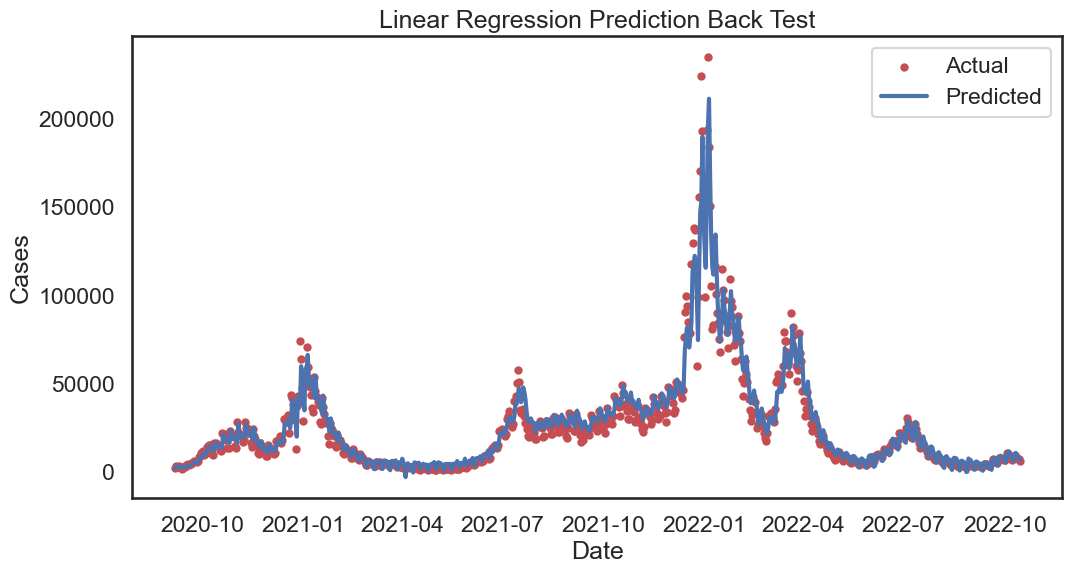

In [40]:
case_feature = ['retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline',
                'workplaces_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline',
                'parks_percent_change_from_baseline', 
                'residential_percent_change_from_baseline',
                'Cases_lag1',
                'Cases_lag2',
                'Cases_lag3',
                'Cases_lag4',
                'Cases_lag5',
                'Cases_lag6'
               ]

# time lag
target_lag_days = 7
data['Cases_target'] = data['Cases'].shift(target_lag_days)
lag_days = 1
data['Cases_lag1'] = data['Cases'].shift(lag_days)
lag_days = 2
data['Cases_lag2'] = data['Cases'].shift(lag_days)
lag_days = 3
data['Cases_lag3'] = data['Cases'].shift(lag_days)
lag_days = 4
data['Cases_lag4'] = data['Cases'].shift(lag_days)
lag_days = 5
data['Cases_lag5'] = data['Cases'].shift(lag_days)
lag_days = 6
data['Cases_lag6'] = data['Cases'].shift(lag_days)

case_target = 'Cases'

# deal with NaN
data = data.dropna(subset=['Cases_target'])

build_regression_model(case_feature, case_target)






#### Death

Fold 0 RMSE: 51.18694378462208
Fold 0 R-squared: 0.97691597050869

Fold 1 RMSE: 12.842519311069282
Fold 1 R-squared: 0.9858529724059184

Fold 2 RMSE: 13.61157146062012
Fold 2 R-squared: 0.648525281741908

Fold 3 RMSE: 16.330022968356147
Fold 3 R-squared: 0.9047053796635085

Fold 4 RMSE: 19.393161151753826
Fold 4 R-squared: 0.8083118278643459

Average RMSE across folds: 22.672843735284296
Average R-squared: 0.8648622864368741


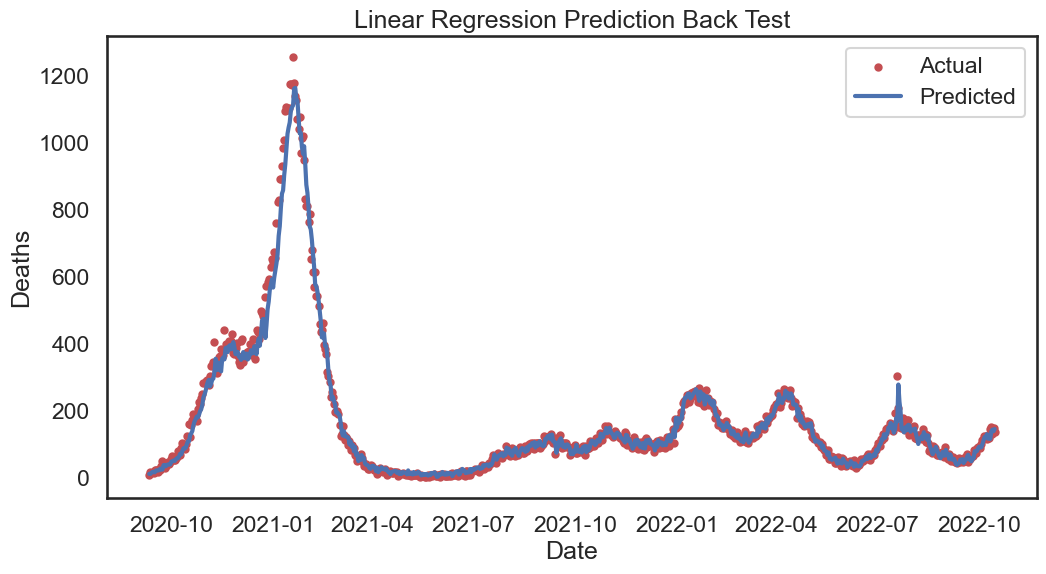

In [41]:
Deaths_feature = ['retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline',
                'workplaces_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline',
                'parks_percent_change_from_baseline', 
                'residential_percent_change_from_baseline',
                'Death_lag1',
                'Death_lag2',
                'Death_lag3',
                'Death_lag4',
                'Death_lag5',
                'Death_lag6'
               ]

# time lag
target_lag_days = 7
data['Deaths_target'] = data['Deaths'].shift(target_lag_days)
lag_days = 1
data['Death_lag1'] = data['Deaths'].shift(lag_days)
lag_days = 2
data['Death_lag2'] = data['Deaths'].shift(lag_days)
lag_days = 3
data['Death_lag3'] = data['Deaths'].shift(lag_days)
lag_days = 4
data['Death_lag4'] = data['Deaths'].shift(lag_days)
lag_days = 5
data['Death_lag5'] = data['Deaths'].shift(lag_days)
lag_days = 6
data['Death_lag6'] = data['Deaths'].shift(lag_days)

Deaths_target = 'Deaths'

# deal with NaN
data = data.dropna(subset=['Deaths_target'])

build_regression_model(Deaths_feature, Deaths_target)







#### Hospital

Fold 0 RMSE: 1061.0183778442859
Fold 0 R-squared: 0.9886736247650807

Fold 1 RMSE: 188.77384798855962
Fold 1 R-squared: 0.9977982521941553

Fold 2 RMSE: 143.53780149419623
Fold 2 R-squared: 0.968733181864031

Fold 3 RMSE: 308.07454851387297
Fold 3 R-squared: 0.9910850947326411

Fold 4 RMSE: 169.51233728313207
Fold 4 R-squared: 0.9968896278320475

Average RMSE across folds: 374.18338262480927
Average R-squared: 0.988635956277591


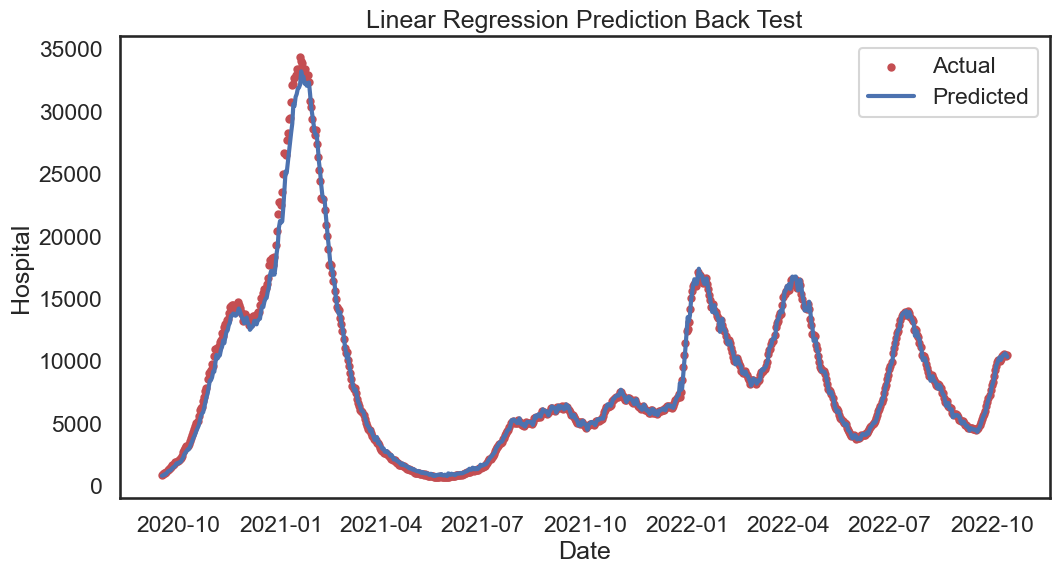

In [42]:
Hospital_feature = ['retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline',
                'workplaces_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline',
                'parks_percent_change_from_baseline', 
                'residential_percent_change_from_baseline',
                'Hospital_lag1',
                'Hospital_lag2',
                'Hospital_lag3',
                'Hospital_lag4',
                'Hospital_lag5',
                'Hospital_lag6'
               ]

# time lag
target_lag_days = 7
data['Hospital_target'] = data['Hospital'].shift(target_lag_days)
lag_days = 1
data['Hospital_lag1'] = data['Hospital'].shift(lag_days)
lag_days = 2
data['Hospital_lag2'] = data['Hospital'].shift(lag_days)
lag_days = 3
data['Hospital_lag3'] = data['Hospital'].shift(lag_days)
lag_days = 4
data['Hospital_lag4'] = data['Hospital'].shift(lag_days)
lag_days = 5
data['Hospital_lag5'] = data['Hospital'].shift(lag_days)
lag_days = 6
data['Hospital_lag6'] = data['Hospital'].shift(lag_days)

Hospital_target = 'Hospital'

# deal with NaN
data = data.dropna(subset=['Hospital_target'])

build_regression_model(Hospital_feature, Hospital_target)







#### Conclusion

In data processing, we used time lag, normalisation, and dealing with NAN to enable the data to perform better regression analysis. 

In feature selection, for different variables, we plotted their heatmap to observe the degree of correlation between them, and we also introduced variables such as Consumption, Essentials, and Residential to make the model more effective. 

For this time series linear regression model, we introduced autoregressive variables to make the model significantly more effective and back test by cross validation to validate the model. For cases, admission, hospital and death, linear regression and prediction were performed respectively, the goodness of fit and the comparison between predicted and true values are shown above, which shows that the strategy we used can get better results. 

In addition, we can use other types of models, like LSTM, GRU, ARIMAX, to improve our work.
